# CSE688: Practical and Application of Machine Learning - Spring 2021
## Assignment 4d
### Authors

- B073040018 朱劭璿
- B072010029 陳居廷

#### (d) Please use Isolation Forest to detect images that is not of digits 1, 3, 5, 7

## Create Dataset

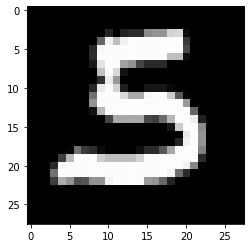

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from utils import anomaly_detect_split, AnomalyValidation

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
images = np.concatenate((train_images, test_images))
labels = np.concatenate((train_labels, test_labels))
# Normalize pixel values to be between 0 and 1
images = images / 255.0

(
    train_images, 
    train_labels, 
    val_images, 
    val_labels, 
    test_images, 
    test_labels
) = anomaly_detect_split(images, labels)

plt.imshow(train_images[0], cmap='gray')

## Data preprocessing for Isolation Forest

In [2]:
# flatten
train_images = train_images.reshape(train_images.shape[0], -1)
val_images = val_images.reshape(val_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)

# Set all training labels to normal (0)
train_labels = np.zeros(train_labels.shape[0])

# Merge validation and testing data
test_images = np.concatenate((test_images, val_images))
test_labels = np.concatenate((test_labels, val_labels))

print(f'Number of training samples: {train_labels.shape[0]}')
print(f'Number of testing samples: {test_labels.shape[0]}')

Number of training samples: 14312
Number of testing samples: 70000


## Training

In [3]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_jobs=-1)
y_pred_train = clf.fit_predict(train_images)
n_correct = ((y_pred_train == -1) == train_labels).sum()
print(f'Anomaly detection accuracy: {n_correct / train_labels.shape[0]: .6f}')

Anomaly detection accuracy:  0.853200


## Inference

In [4]:
y_pred_test = clf.predict(test_images)
n_correct = ((y_pred_test == -1) == test_labels).sum()
print(f'Anomaly detection accuracy: {n_correct / test_labels.shape[0]: .6f}')

Anomaly detection accuracy:  0.623057
